In [10]:
import numpy as np
import pandas as pd
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

In [11]:
np.random.seed(42)
n_A, n_B = 100, 120  
p_A, p_B = 0.75, 0.65 

In [12]:
data_A = np.random.choice([1, 0], size=n_A, p=[p_A, 1-p_A])
data_B = np.random.choice([1, 0], size=n_B, p=[p_B, 1-p_B])

df = pd.DataFrame({
    'Method': ['A'] * n_A + ['B'] * n_B,
    'Outcome': np.concatenate([data_A, data_B])
})

In [13]:
pass_A, pass_B = sum(data_A), sum(data_B)
prop_A, prop_B = pass_A / n_A, pass_B / n_B

In [14]:
se = np.sqrt(prop_A * (1 - prop_A) / n_A + prop_B * (1 - prop_B) / n_B)
diff_prop = prop_A - prop_B
z_value = 1.96 
ci_lower, ci_upper = diff_prop - z_value * se, diff_prop + z_value * se

In [15]:
z_stat = diff_prop / se
scores_A = np.random.uniform(0.5, 1.0, n_A) * data_A
scores_B = np.random.uniform(0.5, 1.0, n_B) * data_B

In [16]:
true_labels = np.concatenate([data_A, data_B])
scores = np.concatenate([scores_A, scores_B])

In [17]:
fpr, tpr, _ = roc_curve(true_labels, scores)
roc_auc = auc(fpr, tpr)

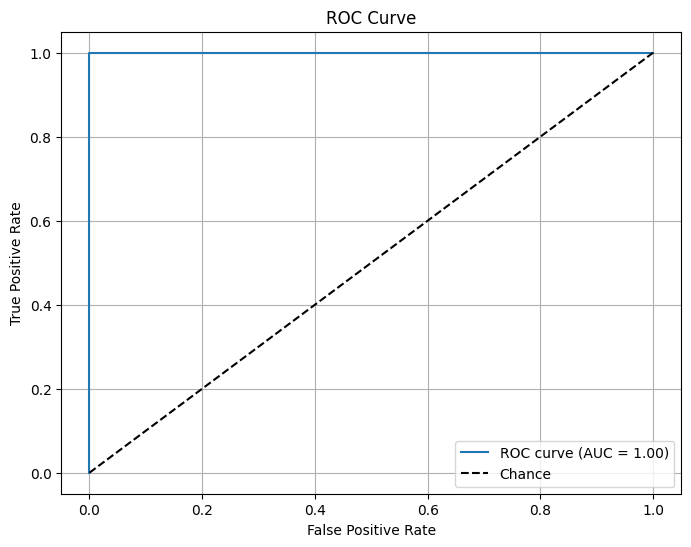

Summary of Results:
   Method A Pass Rate  Method B Pass Rate  Difference in Proportions  \
0                0.76            0.658333                   0.101667   

   95% CI (Lower)  95% CI (Upper)  Z-statistic  ROC AUC  
0        -0.01753        0.220863     1.671746      1.0  


In [18]:
results = {
    'Method A Pass Rate': prop_A,
    'Method B Pass Rate': prop_B,
    'Difference in Proportions': diff_prop,
    '95% CI (Lower)': ci_lower,
    '95% CI (Upper)': ci_upper,
    'Z-statistic': z_stat,
    'ROC AUC': roc_auc
}

results_df = pd.DataFrame([results])

plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label='Chance')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend(loc='lower right')
plt.grid()
plt.show()

print("Summary of Results:")
print(results_df)